In [2]:
#Se importan las librerias necesarias
from sklearn import metrics
import numpy as np # linear algebra
import pandas as pd # data processing
import re, string, nltk
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup

In [3]:
#Se importa el set de datos de entrenamiento 
data = pd.read_excel("TrainEcuadorFinal.xlsx")

#print head
data.head()

,tweetid,user,content,value,country,Polarity_Rating
0,NaN,NaN,"""Mi comentario es Delilú porque así lo quieres...",NEU,Ecuador,Neutral
1,NaN,NaN,#Delilú #mi dulce delilú no podría comérmelo s...,P,Ecuador,Positive
2,NaN,NaN,#Delilù es la mejor crema de chocolate😋😋 ami f...,P,Ecuador,Positive
3,NaN,NaN,#DelilúEnNavidad Mi Árbolito Navideño✨🎄🎄 junto...,P,Ecuador,Positive
4,NaN,NaN,#DelilúEnNavidad MI ARBOLITO 🎄 NAVIDEÑO CON UN...,P,Ecuador,Positive


In [4]:
#Se limpian los comentarios para posteriormente preprocesarlos
data_clean = data.copy()
data_clean['content_clean'] = data_clean['content'].apply(lambda x: BeautifulSoup(x, "lxml").text)
data_clean = data_clean.loc[:, ['content_clean', 'Polarity_Rating']]
data_clean.head()

C:\Users\JORDY\AnacondaV3\lib\site-packages\bs4\__init__.py:329: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\JORDY\AnacondaV3\lib\site-packages\bs4\__init__.py:414: MarkupResemblesLocatorWarning: "https://youtu.be/xMd07Vky4QQ" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\JORDY\AnacondaV3\lib\site-packages\bs4\__init__.py:414: MarkupResemblesLocatorWarning: "https://m.facebook.com/story.php?story_fbid=1683973844965031&id=100000572966470&ref=bookmarks" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\JORDY\AnacondaV3\lib\site-packag

,content_clean,Polarity_Rating
0,"""Mi comentario es Delilú porque así lo quieres...",Neutral
1,#Delilú #mi dulce delilú no podría comérmelo s...,Positive
2,#Delilù es la mejor crema de chocolate😋😋 ami f...,Positive
3,#DelilúEnNavidad Mi Árbolito Navideño✨🎄🎄 junto...,Positive
4,#DelilúEnNavidad MI ARBOLITO 🎄 NAVIDEÑO CON UN...,Positive


In [5]:
data_clean['content_clean'] = data_clean['content_clean'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) #elimina url

In [6]:
data_clean['content_clean'] = data_clean['content_clean'].apply(lambda x: re.split('\d+', str(x))[0]) #elimina palabras con numeros

In [7]:
#Elimina palabras con letras repetidas
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) > 1:
      return tchr[0:1]
      
def check_unique_char(rep, sent_text):
    
    convert = re.sub(r'(\w)\1+', 
                     rep,
                     sent_text)
      
    # retorna la palabra convertida
    return convert
  
data_clean['content_clean'] = data_clean['content_clean'].apply(
                                   lambda x : check_unique_char(conti_rep_char,
                                                              x))
# mostrar Dataframe
data_clean

,content_clean,Polarity_Rating
0,"""Mi comentario es Delilú porque así lo quieres...",Neutral
1,#Delilú #mi dulce delilú no podría comérmelo s...,Positive
2,#Delilù es la mejor crema de chocolate😋😋 ami f...,Positive
3,#DelilúEnNavidad Mi Árbolito Navideño✨🎄🎄 junto...,Positive
4,#DelilúEnNavidad MI ARBOLITO 🎄 NAVIDEÑO CON UN...,Positive
...,...,...
5396,#NuestraRecetaLaFavorita Nuestro sueño en fami...,Positive
5397,Uy que emoción desde hoy estaré muchísimo más ...,Positive
5398,¡Exquisita Rosa! Encuentra la receta aquí: bit...,Positive
5399,"Muy bien Wendy, nos encanta saber a quien admi...",Positive


In [10]:
# Para instalar paquete de emojis preestablecidos
!pip install emoji

In [11]:
# Se importa libreria emoji
import emoji

def get_mentions_processing(text):
    return " ".join(filter(lambda x:x[0]!='@', text.split())) #no menciones

def get_hashtags_processing(text):
    return " ".join(filter(lambda x:x[0]!='#', text.split())) #no hashtags

def get_emojis_processing(text):
    return str(emoji.demojize(text,language='es')).replace(":"," ") #emojis a texto

def get_less3words_processing(text):
    return ' '.join([word for word in text.split() if len(word)>2]) #palabras con menos de 3 caracteres

def get_text_processing(text):
    stpword = stopwords.words('spanish')
    no_punctuation = [char for char in text if char not in string.punctuation] #elimina puntuacion
    no_punctuation = ''.join(no_punctuation).lower() #convierte en minuscula
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword]) #elimina stopwords

In [12]:
# Se importan y se descargan stopwords preestablecidos
from nltk.corpus import stopwords
nltk.download('stopwords')
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
df1 = pd.DataFrame()
df1 = data_clean
df1['content_clean'] = data_clean['content_clean']
df1['Content_Review'] = data_clean['content_clean'].apply(get_mentions_processing)
df1['Content_Review1'] = df1['Content_Review'].apply(get_hashtags_processing)
df1['Content_Review2'] = df1['Content_Review1'].apply(get_emojis_processing)
df1['Content_Review3'] = df1['Content_Review2'].apply(get_text_processing)
df1['Content_Review4'] = df1['Content_Review3'].apply(get_less3words_processing) #En un dataframe, se remueven los stopwords y obtienen los comentarios limpios con los que se va a trabajar
df1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JORDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content_clean,Polarity_Rating,Content_Review,Content_Review1,Content_Review2,Content_Review3,Content_Review4
0,"Nos encanta su empresa, esperamos poder servir...",Positive,"Nos encanta su empresa, esperamos poder servir...","Nos encanta su empresa, esperamos poder servir...","Nos encanta su empresa, esperamos poder servir...",encanta empresa esperamos poder servirles pron...,encanta empresa esperamos poder servirles pron...
1,"¡Mucha suerte para ti, Marthi! :D <",Neutral,"¡Mucha suerte para ti, Marthi! :D <","¡Mucha suerte para ti, Marthi! :D <","¡Mucha suerte para ti, Marthi! D <",¡mucha suerte marthi d,¡mucha suerte marthi
2,antes meados de pero caliente que una cañita d...,Negative,antes meados de pero caliente que una cañita d...,antes meados de pero caliente que una cañita d...,antes meados de pero caliente que una cañita d...,meados caliente cañita cruzcampo arsa,meados caliente cañita cruzcampo arsa
3,Felicitamos a todos nuestros estudiantes de la...,Neutral,Felicitamos a todos nuestros estudiantes de la...,Felicitamos a todos nuestros estudiantes de la...,Felicitamos a todos nuestros estudiantes de la...,felicitamos estudiantes responder pregunta sem...,felicitamos estudiantes responder pregunta sem...
4,Cruzcampo :) @ Bilbao Centro,Neutral,Cruzcampo :) Bilbao Centro,Cruzcampo :) Bilbao Centro,Cruzcampo ) Bilbao Centro,cruzcampo bilbao centro,cruzcampo bilbao centro
...,...,...,...,...,...,...,...
5396,#DelilúMiAmor Yo estoy en una relación con DEL...,Positive,#DelilúMiAmor Yo estoy en una relación con DEL...,Yo estoy en una relación con DELILÚ!,Yo estoy en una relación con DELILÚ!,relación delilú,relación delilú
5397,Hola Feliz Navidad al grupo de la FAVORITA,Neutral,Hola Feliz Navidad al grupo de la FAVORITA,Hola Feliz Navidad al grupo de la FAVORITA,Hola Feliz Navidad al grupo de la FAVORITA,hola feliz navidad grupo favorita,hola feliz navidad grupo favorita
5398,#RecetaParaElExito #LaFavorita si participando...,Neutral,#RecetaParaElExito #LaFavorita si participando...,si participando por mi negocio,si participando por mi negocio,si participando negocio,participando negocio
5399,@Tomas,Neutral,,,,,


In [13]:
# Se crea un dataframe con unicamente el comentario y su polaridad en cuanto al sentimiento
df2 = pd.DataFrame()
df2 = df1
df2 = df1[['Content_Review4', 'Polarity_Rating']]
df2.head()

,Content_Review4,Polarity_Rating
0,encanta empresa esperamos poder servirles pron...,Positive
1,¡mucha suerte marthi,Neutral
2,meados caliente cañita cruzcampo arsa,Negative
3,felicitamos estudiantes responder pregunta sem...,Neutral
4,cruzcampo bilbao centro,Neutral


In [14]:
# Elimino registros con Answers NaN
df2['Content_Review4'] = df2['Content_Review4'].replace('', np.nan) # Reemplazo los registros vacíos con NaN
print(df2['Content_Review4'].isna().sum()) 
df2 = df2.dropna(axis=0, subset=['Content_Review4'])
print(df2.shape)
df2

315
(5086, 2)


<ipython-input-14-178ae3d6fd43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Content_Review4'] = df2['Content_Review4'].replace('', np.nan) # Reemplazo los registros vacíos con NaN


,Content_Review4,Polarity_Rating
0,encanta empresa esperamos poder servirles pron...,Positive
1,¡mucha suerte marthi,Neutral
2,meados caliente cañita cruzcampo arsa,Negative
3,felicitamos estudiantes responder pregunta sem...,Neutral
4,cruzcampo bilbao centro,Neutral
...,...,...
5395,gracias confianza carasonriendoconojosdecorazón,Positive
5396,relación delilú,Positive
5397,hola feliz navidad grupo favorita,Neutral
5398,participando negocio,Neutral


In [15]:
# Se cuenta el numero de comentarios por cada polaridad
print(df2['Polarity_Rating'].value_counts())

Neutral     2944
Positive    1848
Negative     294
Name: Polarity_Rating, dtype: int64


In [16]:
# Se realiza la division del set de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size=0.3, random_state=42) 
X_train = train['Content_Review4'].values
X_test = test['Content_Review4'].values
y_train = train['Polarity_Rating']
y_test = test['Polarity_Rating']

In [17]:
# Se imprime la cantidad de palabras de cada segmento (entrenamiento y prueba)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3560,)
(1526,)
(3560,)
(1526,)


In [18]:
# Se transforma el texto en vectores de datos numericos 
vect1 = CountVectorizer()
X_train = vect1.fit_transform(X_train)
X_test = vect1.transform(X_test)

In [19]:
# Se vuelve a imprimir la cantidad de palabras de cada segmento 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3560, 6837)
(1526, 6837)
(3560,)
(1526,)


In [20]:
# Se imprimen los vectores de features (palabras de comentarios)
print(vect1.get_feature_names())

['abajo', 'abastecer', 'abc', 'abcd', 'abces', 'abel', 'abi', 'abigail', 'ablande', 'abra', 'abrazar', 'abrazo', 'abrazos', 'abren', 'abri', 'abrir', 'abrá', 'absolutamente', 'absorbido', 'abuela', 'abuelita', 'abundante', 'aburida', 'abusados', 'aca', 'acaba', 'acabado', 'acaban', 'acabaron', 'acaben', 'acabo', 'acabé', 'acabó', 'academia', 'acampando', 'acapela', 'aceder', 'aceita', 'aceite', 'aceitegirasol', 'aceites', 'aceitito', 'aceité', 'acentos', 'acentuar', 'acepta', 'aceptan', 'acepto', 'aceptó', 'acerque', 'acesible', 'aceso', 'acesorios', 'achaquen', 'achiote', 'acho', 'achote', 'achotito', 'achoto', 'acidente', 'acides', 'acidez', 'acionistas', 'aciote', 'aclaración', 'acompaña', 'acompañada', 'acompañado', 'acompañados', 'acompañan', 'acompañandonos', 'acompañante', 'acompañar', 'acompañarlo', 'acompañaron', 'acompañat', 'acompañe', 'acompaño', 'acompañó', 'aconpanñadas', 'aconseja', 'acordandoce', 'acordar', 'acordaron', 'acorde', 'acosta', 'acostarme', 'actitud', 'activ

In [21]:
# Se mide la importancia de cada termino en base a su frecuencia
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [22]:
# Se vuelve a imprimir la cantidad de palabras de cada segmento 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3560, 6837)
(1526, 6837)
(3560,)
(1526,)


In [23]:
# Se aplica la reduccion de dimensionalidad mediante la tecnica SVD
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X_train)

TruncatedSVD(n_components=5, n_iter=7, random_state=42)

In [24]:
# Se establece el numero de componentes e iteraciones para el SVD
svd = TruncatedSVD(n_components=4000, n_iter=7, random_state=42)
svd.fit(X_train)
percent_variance_retained = svd.explained_variance_ / np.sum(svd.explained_variance_)
cumulative_variance_retained = np.cumsum(percent_variance_retained) # se calcula la varianza acumulada retenida

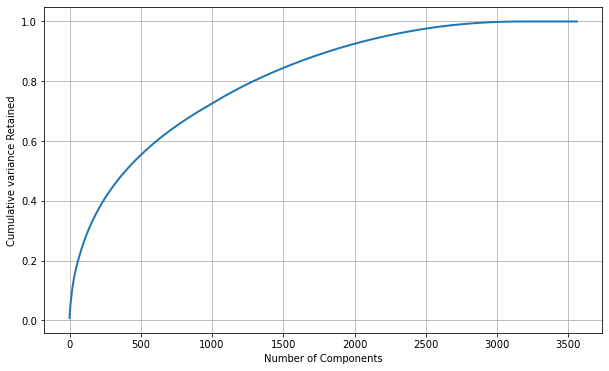

In [25]:
# Se grafica la curva del numero de componentes vs. la varianza acumulada retenida
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.plot(cumulative_variance_retained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance Retained')
plt.show()

In [26]:
# Se determina el numero de componentes en base a la curva 
NComponents = 3500
svd = TruncatedSVD(n_components=NComponents, n_iter=7, random_state=42)
X_svd_train = svd.fit_transform(X_train)
X_svd_test = svd.transform(X_test)

In [27]:
# Se verifica la cantidad de palabras de cada segmento 
print(X_svd_train.shape)
print(X_svd_test.shape)
print(y_train.shape)
print(y_test.shape)

(3560, 3500)
(1526, 3500)
(3560,)
(1526,)


In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
svc=SVC(kernel='poly',C=0.1, degree=3, coef0=0.0, class_weight='balanced') # Se aplica el modelo SVM con sus parametros
scores = cross_val_score(svc, X_svd_train, y_train, cv=10, scoring='accuracy') # Se valida el modelo con 10 folds
svc = SGDClassifier(max_iter=7) # Se establece el numero de iteraciones sobre el set de entrenamiento 
svc.fit(X_svd_train, y_train) # Se ajusta el modelo 

C:\Users\JORDY\AnacondaV3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=7)

In [29]:
# Accuracy en el set de prueba
svc.score(X_svd_test, y_test)

0.752948885976409

In [30]:
# Predecir en el set de prueba 
predicted_sentiments = svc.predict(X_svd_test)
predicted_sentiments

array(['Neutral', 'Neutral', 'Neutral', ..., 'Positive', 'Neutral',
       'Neutral'], dtype='<U8')

In [31]:
# Desplegar metricas para el modelo
report = metrics.classification_report(y_true=y_test, 
                                           y_pred=predicted_sentiments, 
                                           labels=['Positive', 'Negative', 'Neutral'])
print(report)

              precision    recall  f1-score   support

    Positive       0.76      0.62      0.69       541
    Negative       0.46      0.21      0.29        84
     Neutral       0.76      0.88      0.82       901

    accuracy                           0.75      1526
   macro avg       0.66      0.57      0.60      1526
weighted avg       0.74      0.75      0.74      1526



Confusion matrix, without normalization
[[ 18  59   7]
 [ 10 793  98]
 [ 11 192 338]]
Normalized confusion matrix
[[0.21428571 0.70238095 0.08333333]
 [0.01109878 0.88013319 0.10876804]
 [0.02033272 0.35489834 0.62476895]]


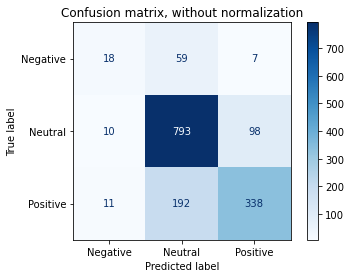

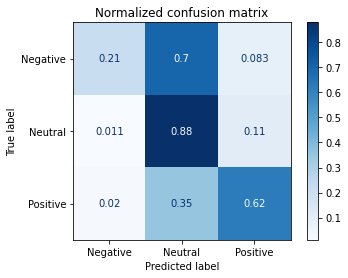

In [32]:
# Graficar matrices de confusión sin y con normalizacion 
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_svd_test, y_test,
                                 display_labels=['Negative', 'Neutral', 'Positive'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()